#Loading in Modules and the Data

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor 
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data_dir = "https://raw.githubusercontent.com/rroggenk/DATA301/main/"

#K-nearest neighbors (KNN) algorithm on Flying Etiquette dataset

In [ ]:
df_flying_etiquette = pd.read_csv(data_dir + "flying-etiquette.csv")
df_flying_etiquette = df_flying_etiquette[df_flying_etiquette["How often do you travel by plane?"] != "Never"]

In [ ]:
df_flying_etiquette = df_flying_etiquette.dropna().reset_index(drop=True)

Let's look at all of the different questions that we can formulate a machine learning algorithm on. 

In [ ]:
for col in df_flying_etiquette.columns:
    print(col)

RespondentID
How often do you travel by plane?
Do you ever recline your seat when you fly?
How tall are you?
Do you have any children under 18?
In a row of three seats, who should get to use the two arm rests?
In a row of two seats, who should get to use the middle arm rest?
Who should have control over the window shade?
Is itrude to move to an unsold seat on a plane?
Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?
On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?
Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?
Is itrude to recline your seat on a plane?
Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?
Is it rude to ask someone to switch seats with you in order to be closer to friends?
Is itrude to ask someone to switch seats with you 

Height is currently a categorical variable. Let's turn it into a quantitative variable.

Note: We will classify everyone who is under 5 feet as 60 inches and everyone who is over 6'6" as 78 inches.

In [ ]:
def feet_to_inches(s) -> int:
  if s == "Under 5 ft.":
    return 60
  if s == "6'6\" and above":
    return 78
  lst = s.split(sep = "'")
  feet = int(lst[0])
  inches = int(lst[1][:-1])
  return 12 * feet + inches

In [ ]:
df_flying_etiquette["Height"] = df_flying_etiquette.apply(lambda row: feet_to_inches(row["How tall are you?"]), axis=1) 
df_flying_etiquette

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height
0,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,68
1,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,71
2,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,67
3,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,69
4,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,64
683,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,63
684,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific,73
685,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,67


Let's make a k-nearest neighbors model to predict if people recline their seats when they fly using the predictor variables height and age.

For reference, this is what the predicted value options are:


In [ ]:
df_flying_etiquette["Do you ever recline your seat when you fly?"].value_counts()

Once in a while        199
Usually                154
Never                  129
Always                 112
About half the time     93
Name: Do you ever recline your seat when you fly?, dtype: int64

In [ ]:
df_flying_etiquette = df_flying_etiquette[["Do you ever recline your seat when you fly?",
                                          "Height",
                                          "Age"]].dropna().reset_index(drop=True)

In [ ]:
X_train = df_flying_etiquette[["Height",
                                "Age"]]
y_train = df_flying_etiquette["Do you ever recline your seat when you fly?"]

In [ ]:
ct_flyet = make_column_transformer(
    (OneHotEncoder(sparse=False), ["Height",
                               "Age"]),
    remainder='passthrough'
)

knn_model = make_pipeline(
    ct_flyet,
    KNeighborsClassifier(n_neighbors=5)
)

knn_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Height', 'Age'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Accuracy**

In [ ]:
cv_scores = cross_val_score(knn_model, X_train, y_train, 
                            cv=10, scoring="accuracy")
cv_scores.mean()

0.23437766410912192

Yikes! Our accuracy of 23% is pretty terrible. Let's try converting our response variable - "Do you ever recline your seat when you fly?" - to one with a binary options. If a person has reclined their seat on a plane at least once, we'll group them in the "Yes" category, and if they have never reclined their seat before, they will be in the "No" category. 




In [ ]:
def recline_binary(s) -> int:
  if s == "Never":
    return "No"
  return "Yes"

In [ ]:
df_flying_etiquette_binary = df_flying_etiquette.copy()
df_flying_etiquette_binary["Recline"] = df_flying_etiquette.apply(lambda row: recline_binary(row["Do you ever recline your seat when you fly?"]), axis=1) 

In [ ]:
df_flying_etiquette_binary["Recline"].value_counts()

Yes    558
No     129
Name: Recline, dtype: int64

Let's try our k-nearest neighbors model again using the same predictor variables, but this time our response variable will be binary. 

In [ ]:
df_flying_etiquette_binary = df_flying_etiquette_binary[["Recline",
                                               "Height",
                                               "Age"]].dropna().reset_index(drop=True)

In [ ]:
X_train = df_flying_etiquette_binary[["Height",
                                          "Age"]]
y_train = df_flying_etiquette_binary["Recline"]

In [ ]:
ct_flyet = make_column_transformer(
    (OneHotEncoder(sparse=False), ["Height",
                               "Age"]),
    remainder='passthrough'
)

knn_model = make_pipeline(
    ct_flyet,
    KNeighborsClassifier(n_neighbors=5)
)

knn_model.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Height', 'Age'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

To optimize our accuracy, let's perform a grid search to determine the best k value. 

In [ ]:
grid_search = GridSearchCV(
    knn_model,
    param_grid={"kneighborsclassifier__n_neighbors": range(1, 50)},
    scoring="accuracy",
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 21}

We will update our model to use 21 nearest neighbors.

In [ ]:
knn_model = make_pipeline(
    ct_flyet,
    KNeighborsClassifier(n_neighbors=21)
)

knn_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Height', 'Age'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=21))])

**Accuracy**

In [ ]:
cv_scores = cross_val_score(knn_model, X_train, y_train, 
                            cv=10, scoring="accuracy")
cv_scores.mean()

0.8136828644501278

Yay! We got an accuracy of 81%. That is a huge improvement from our previous model of 23% accuracy. 

**Precision**

In [ ]:
recline = (y_train == "Yes")

cv_scores = cross_val_score(knn_model, X_train, recline, 
                            cv=10, scoring="precision")
cv_scores.mean()

0.8134271099744245

In [ ]:
dont_recline = (y_train == "No")

cv_scores = cross_val_score(knn_model, X_train, dont_recline, 
                            cv=10, scoring="precision")
cv_scores.mean()

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

0.1

**Recall**

In [ ]:
recline = (y_train == "Yes")

cv_scores = cross_val_score(knn_model, X_train, recline, 
                            cv=10, scoring="recall")
cv_scores.mean()

1.0

In [ ]:
dont_recline = (y_train == "No")

cv_scores = cross_val_score(knn_model, X_train, dont_recline, 
                            cv=10, scoring="recall")
cv_scores.mean()

0.007692307692307693

To make predictions on ourselves, we'll define a new dataframe an used the built-in predict function. 

In [ ]:
# define the test data (recall that scikit-learn expects a 2D-array)
x_new = pd.DataFrame(columns=["Height",
                              "Age"])
x_new.loc[0] = [63, "18-29"]
x_new.loc[1] = [69, "18-29"]
knn_model.predict(x_new)

array(['Yes', 'Yes'], dtype=object)

We used our machine learning algorithm on ourselves (Lana - index 0, Rachel - index 1), and it was accurate! We both recline our seats when flying.  

#Ensemble Methods for Regression using International Tourism dataset

In [ ]:
df_international_tourism = pd.read_csv(data_dir + "df_international_tourism.csv")
df_international_tourism = df_international_tourism[df_international_tourism["year"] >= 1995]

In [ ]:
df_2017 = df_international_tourism[df_international_tourism["year"] == 2017]
df_2017.dtypes

Country Name                               object
year                                        int64
total_gdp                                 float64
population                                float64
income_per_person                         float64
co2_emissions                             float64
receipts_percent_total_exports            float64
receipts_travel_items                     float64
receipts_passenger_transport_items        float64
receipts_current_us                       float64
number_of_departures                      float64
number_of_arrivals                        float64
expenditures_passenger_transport_items    float64
expenditures_percent_total_imports        float64
expenditures_current_us                   float64
continent                                  object
sub_region                                 object
dtype: object

We are specifically interested in the variables "receipts_percent_total_exports", "number_of_departures", "expenditures_passenger_transport_items", so we will drop countries where there are missing values in those variables but drop any other variables that have missing values to filter out potential predictor variables.

In [ ]:
df_2017 = df_2017.dropna(subset=["receipts_percent_total_exports", "number_of_departures", "expenditures_passenger_transport_items"]) #dropped two countries where there were missing values in the variables we are interested in
df_2017.dropna(axis='columns')

,Country Name,year,total_gdp,population,income_per_person,co2_emissions,receipts_percent_total_exports,receipts_travel_items,receipts_current_us,number_of_departures,number_of_arrivals,expenditures_passenger_transport_items,expenditures_percent_total_imports,expenditures_current_us
9977,Albania,2017,1.270000e+10,2880000.0,13300.0,1.590,49.471563,1.943000e+09,2.050000e+09,5.186000e+06,5.118000e+06,4.000000e+07,24.058987,1.473000e+09
9980,Argentina,2017,5.830000e+11,44400000.0,22700.0,4.410,7.860525,5.370000e+09,5.830000e+09,2.158300e+07,6.711000e+06,2.802000e+09,15.877179,1.418000e+10
9981,Armenia,2017,1.200000e+10,2950000.0,12700.0,1.890,27.760742,1.204000e+09,1.224000e+09,1.482000e+06,1.495000e+06,5.500000e+07,21.555388,1.218000e+09
9983,Australia,2017,1.460000e+12,24900000.0,49000.0,16.900,14.820693,4.174700e+10,4.397500e+10,1.093200e+07,8.815000e+06,5.240000e+09,13.699768,3.971000e+10
9984,Austria,2017,4.080000e+11,8890000.0,55300.0,7.750,9.949776,2.033300e+10,2.242400e+10,1.149100e+07,2.946000e+07,2.110000e+09,6.048804,1.287800e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,United States,2017,1.960000e+13,327000000.0,61600.0,16.600,9.777483,1.964680e+11,2.337580e+11,1.480450e+08,1.742918e+08,4.035800e+10,5.451567,1.582870e+11
10142,Uzbekistan,2017,1.000000e+11,32500000.0,7080.0,2.810,6.727242,6.890000e+08,8.350000e+08,5.182000e+06,2.690000e+06,4.760000e+08,12.792844,2.107000e+09
10145,Vanuatu,2017,8.370000e+08,293000.0,3090.0,0.529,75.540795,2.650000e+08,2.890000e+08,2.630000e+04,3.327000e+05,3.000000e+06,4.033783,1.900000e+07
10146,Samoa,2017,8.500000e+08,196000.0,6390.0,1.320,59.987355,1.660000e+08,1.670000e+08,5.500000e+04,1.580000e+05,7.000000e+05,0.950797,3.900000e+06


We have eliminated about half of our observations, but the countries that we dropped were mostly small islands so we will not include them in our generalizations.

Next, let's test out a number of different travel-related predictor variables on 3-fold cross-validation. 

In [ ]:
# calculate estimate of test error for a given feature set
def get_cv_error(features):
  # define pipeline
  pipeline = make_pipeline(
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=5)
  )
  # calculate errors from cross-validation
  cv_errs = -cross_val_score(pipeline, X=df_2017[features], 
                             y=df_2017["co2_emissions"],
                             scoring="neg_mean_squared_error", cv=3)
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# calculate and store errors for different feature sets
errs = pd.Series()
for features in [["income_per_person", "population", "receipts_travel_items"],
                 ["income_per_person", "population", "number_of_departures"],
                 ["income_per_person", "population", "receipts_current_us"],
                 ["income_per_person", "population", "receipts_percent_total_exports"],
                 ["income_per_person", "population", "expenditures_percent_total_imports"]]:
  errs[str(features)] = get_cv_error(features)

errs

<ipython-input-28-4dcc10afb33d>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  errs = pd.Series()


['income_per_person', 'population', 'receipts_travel_items']                 13.419724
['income_per_person', 'population', 'number_of_departures']                  14.287091
['income_per_person', 'population', 'receipts_current_us']                   13.677253
['income_per_person', 'population', 'receipts_percent_total_exports']        13.551865
['income_per_person', 'population', 'expenditures_percent_total_imports']    13.893469
dtype: float64

The model that gives us the lowest error when predicting "co2_emissions" is the one that include predictor variables 'income_per_person', 'population', and 'receipts_travel_items'.    

In [ ]:
X_train = df_2017[["income_per_person", "population", "receipts_travel_items"]]
y_train = df_2017["co2_emissions"]

In [ ]:
linear_model = make_pipeline(
    LinearRegression()
)

linear_model.fit(X=X_train, y=y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=3)
)
knn_model.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))])

In [ ]:
ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)

VotingRegressor(estimators=[('linear',
                             Pipeline(steps=[('linearregression',
                                              LinearRegression())])),
                            ('knn',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('kneighborsregressor',
                                              KNeighborsRegressor(n_neighbors=3))]))])

In [ ]:
for model in [linear_model, knn_model, ensemble_model]:
    print(-cross_val_score(model, X=X_train, y=y_train, cv=5,
                           scoring="neg_mean_squared_error").mean())

12.295825712894542
14.982486225396823
11.767698616704475


Wow! Our ensemble model had the lowest cross-validation score, so let's use it!

In [ ]:
# get model's predictions on validation set
y_predict = ensemble_model.predict(X_train)

# calculate RMSE on validation set
rmse = np.sqrt(mean_squared_error(y_train, y_predict))
rmse

2.721978072758195

Ouch, that's a pretty high rmse value. Oh well! 

#8.1 Working with Time Series Data

Let's make some visualizations with our time series data. 

In [ ]:
df_time_series = df_international_tourism
column = "number_of_arrivals"
df_time_series[column] = MinMaxScaler().fit_transform(np.array(df_time_series[column]).reshape(-1,1))
df_time_series.index = pd.to_datetime(df_time_series["year"], format="%Y")

NameError: ignored

In [ ]:
df_us = df_time_series[df_time_series["Country Name"] == "United States"]
arrivals_us = df_us["number_of_arrivals"]
arrivals_us.plot.line()

In [ ]:
(arrivals_us[arrivals_us.index < datetime(2010, 1, 1)].
 plot.line())

In [ ]:
df_germany = df_time_series[df_time_series["Country Name"] == "Germany"]
arrivals_de = df_germany["number_of_arrivals"]
arrivals_de.plot.line()

In [ ]:
df_vietnam = df_time_series[df_time_series["Country Name"] == "Vietnam"]
arrivals_v = df_vietnam["number_of_arrivals"]
arrivals_v.plot.line()

In [ ]:
df_canada = df_time_series[df_time_series["Country Name"] == "Canada"]
arrivals_c = df_canada["number_of_arrivals"]
arrivals_c.plot.line()

In [ ]:
arrivals_1y = df_time_series.resample("1Y")["number_of_arrivals"].mean()
arrivals_1y.plot.line()
arrivals_1y

#8.2 Time Series Forecasting

We can use forecasting to make predictions about the future.

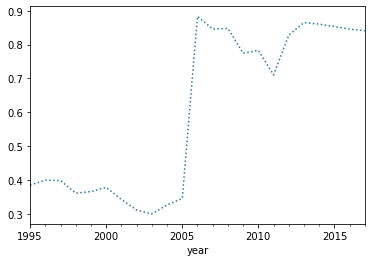

In [ ]:
y_train = df_us["number_of_arrivals"]
y_train.plot.line(style=":")

In [ ]:
date = df_us.index
t = date.year + (30 * (date.month - 1) + date.day) / 365
t

Float64Index([1995.0027397260274, 1996.0027397260274, 1997.0027397260274,
              1998.0027397260274, 1999.0027397260274, 2000.0027397260274,
              2001.0027397260274, 2002.0027397260274, 2003.0027397260274,
              2004.0027397260274, 2005.0027397260274, 2006.0027397260274,
              2007.0027397260274, 2008.0027397260274, 2009.0027397260274,
              2010.0027397260274, 2011.0027397260274, 2012.0027397260274,
              2013.0027397260274, 2014.0027397260274, 2015.0027397260274,
              2016.0027397260274, 2017.0027397260274],
             dtype='float64', name='year')

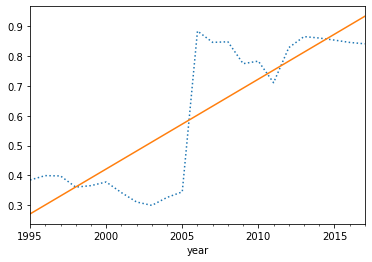

In [ ]:
# Fit linear regression of y on t
model = LinearRegression()
model.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    model.predict(X=t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(t.to_frame())

array([[1.99500274e+03, 3.98003593e+06],
       [1.99600274e+03, 3.98402694e+06],
       [1.99700274e+03, 3.98801994e+06],
       [1.99800274e+03, 3.99201495e+06],
       [1.99900274e+03, 3.99601195e+06],
       [2.00000274e+03, 4.00001096e+06],
       [2.00100274e+03, 4.00401196e+06],
       [2.00200274e+03, 4.00801497e+06],
       [2.00300274e+03, 4.01201998e+06],
       [2.00400274e+03, 4.01602698e+06],
       [2.00500274e+03, 4.02003599e+06],
       [2.00600274e+03, 4.02404699e+06],
       [2.00700274e+03, 4.02806000e+06],
       [2.00800274e+03, 4.03207500e+06],
       [2.00900274e+03, 4.03609201e+06],
       [2.01000274e+03, 4.04011101e+06],
       [2.01100274e+03, 4.04413202e+06],
       [2.01200274e+03, 4.04815502e+06],
       [2.01300274e+03, 4.05218003e+06],
       [2.01400274e+03, 4.05620704e+06],
       [2.01500274e+03, 4.06023604e+06],
       [2.01600274e+03, 4.06426705e+06],
       [2.01700274e+03, 4.06830005e+06]])

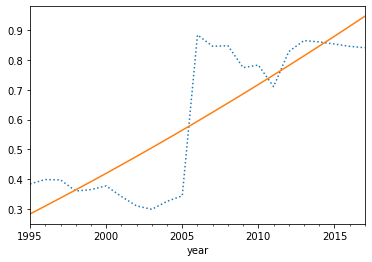

In [ ]:
# Fit linear regression of y on t and t^2
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(X=t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line(style=":")
y_train_.plot.line()

In [ ]:
pipeline.predict([[2030]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1.41544731])

#12.2 Dot Maps

We can use dot maps to better visualize our geographical data - the number of arrivals in each country. 

In [ ]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_covid = df_covid[["Country/Region", "Lat", "Long"]]
df_covid = df_covid.rename(columns={"Country/Region": "Country Name"})
df_covid

,Country Name,Lat,Long
0,Afghanistan,33.939110,67.709953
1,Albania,41.153300,20.168300
2,Algeria,28.033900,1.659600
3,Andorra,42.506300,1.521800
4,Angola,-11.202700,17.873900
...,...,...,...
284,West Bank and Gaza,31.952200,35.233200
285,Winter Olympics 2022,39.904200,116.407400
286,Yemen,15.552727,48.516388
287,Zambia,-13.133897,27.849332


In [ ]:
df_dot_map = df_international_tourism
df_dot_map = df_dot_map.merge(df_covid, on="Country Name", how="left")
df_dot_map

,Country Name,year,total_gdp,population,income_per_person,co2_emissions,receipts_percent_total_exports,receipts_travel_items,receipts_passenger_transport_items,receipts_current_us,number_of_departures,number_of_arrivals,expenditures_passenger_transport_items,expenditures_percent_total_imports,expenditures_current_us,continent,sub_region,Lat,Long
0,Afghanistan,1995,NaN,18900000.0,698.0,0.0619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,33.939110,67.709953
1,Angola,1995,3.400000e+10,14400000.0,1780.0,0.7250,0.703903,1.000000e+07,17000000.0,2.700000e+07,3.000000e+03,0.000040,3.800000e+07,3.211077,1.130000e+08,Africa,Middle Africa,-11.202700,17.873900
2,Albania,1995,5.180000e+09,3100000.0,4910.0,0.6510,23.049062,6.500000e+07,5000000.0,7.000000e+07,NaN,0.001463,1.200000e+07,2.272184,1.900000e+07,Europe,Southern Europe,41.153300,20.168300
3,Andorra,1995,1.850000e+09,64400.0,30800.0,7.0600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Southern Europe,42.506300,1.521800
4,United Arab Emirates,1995,1.540000e+11,2540000.0,58600.0,28.7000,NaN,NaN,NaN,6.320000e+08,NaN,NaN,NaN,NaN,NaN,Asia,Western Asia,23.424076,53.847818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044,Vanuatu,2017,8.370000e+08,293000.0,3090.0,0.5290,75.540795,2.650000e+08,24000000.0,2.890000e+08,2.630000e+04,0.001602,3.000000e+06,4.033783,1.900000e+07,Oceania,Melanesia,-15.376700,166.959200
6045,Samoa,2017,8.500000e+08,196000.0,6390.0,1.3200,59.987355,1.660000e+08,1000000.0,1.670000e+08,5.500000e+04,0.000759,7.000000e+05,0.950797,3.900000e+06,Oceania,Polynesia,-13.759000,-172.104600
6046,South Africa,2017,3.580000e+11,57800000.0,13900.0,8.1000,9.317282,8.817000e+09,889000000.0,9.706000e+09,NaN,0.072244,2.810000e+09,6.078764,6.068000e+09,Africa,Southern Africa,-30.559500,22.937500
6047,Zambia,2017,2.370000e+10,17400000.0,3520.0,0.3020,NaN,6.530000e+08,NaN,NaN,NaN,0.004865,1.870000e+08,4.696653,4.100000e+08,Africa,Eastern Africa,-13.133897,27.849332


In [ ]:
df_dot_map = df_dot_map[df_dot_map["number_of_arrivals"].notna()]
df_dot_map = df_dot_map[df_dot_map["year"] == 2017]

px.scatter_geo(df_dot_map, lat = "Lat", lon = "Long",
               hover_name = "Country Name",
               size = df_dot_map["number_of_arrivals"])